### 데이콘 Basic 범죄 유형 분류 AI 경진대회

- 배경: 범죄 관련 데이터를 분석하여 어떤 유형의 범죄가 발생할지 예측하고, 예측 결과를 바탕으로 범죄에 대한 대응을 빠르게 할 수 있도록 하기 위함

- 주제: 범죄 유형을 분류하는 AI 알고리즘 개발

- 사건 발생 장소 및 기후 데이터 분석을 통해 세 가지 범죄 유형을 분류하는 AI 모델을 개발

- https://dacon.io/competitions/official/236109/overview/description

#### 일부 데이터 설명

-- ID : 샘플 별 고유 id

-- 월 : 사건 발생월

-- 요일 : 월요일 ~ 일요일

-- 시간 : 사건 발생 시각

-- 소관경찰서 : 사건 발생 구역의 담당 경찰서

-- 소관지역 : 사건 발생 구역

-- 사건발생거리 : 가장 가까운 경찰서에서 사건 현장까지의 거리

-- 풍향 : 범죄발생지에서 바람이 부는 방향(최대 360도)

-- 안개 : 가시거리가 1km 미만인 경우

-- 짙은안개 : 가시거리가 200m 미만인 경우

-- 연기/연무 : 먼지, 연기가 하늘을 가리는 현상

-- 범죄발생지 : 범죄가 발생한 장소

-- TARGET : 범죄타입 [0 : 강도, 1: 절도, 2: 상해]




In [2]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [3]:
train_df.head(3)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1


In [4]:
test_df.head(3)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,TEST_00000,9,금요일,5,927,28.0,1.570654,19.625000,0.0,0.0,165.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,차도
1,TEST_00001,5,수요일,3,926,28.0,1.712457,21.444444,0.0,0.0,175.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,식당
2,TEST_00002,5,월요일,6,1437,33.0,0.447496,25.200000,0.0,0.0,290.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지


- 요일 라벨인코딩, 범죄발생지 유일값 개수 찾고 개수가 많지 않으면 인코딩

- 사건발생거리는 소수점 4번째, 강수량은 2번째 자리까지 오게 반올림

- 안개~눈날림까지 날씨 관련 칼럼 유일값 찾기

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       84406 non-null  object 
 1   월        84406 non-null  int64  
 2   요일       84406 non-null  object 
 3   시간       84406 non-null  int64  
 4   소관경찰서    84406 non-null  int64  
 5   소관지역     84406 non-null  float64
 6   사건발생거리   84406 non-null  float64
 7   강수량(mm)  84406 non-null  float64
 8   강설량(mm)  84406 non-null  float64
 9   적설량(cm)  84406 non-null  float64
 10  풍향       84406 non-null  float64
 11  안개       84406 non-null  float64
 12  짙은안개     84406 non-null  float64
 13  번개       84406 non-null  float64
 14  진눈깨비     84406 non-null  float64
 15  서리       84406 non-null  float64
 16  연기/연무    84406 non-null  float64
 17  눈날림      84406 non-null  float64
 18  범죄발생지    84406 non-null  object 
 19  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(4), object(3)
memory usage: 

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17289 entries, 0 to 17288
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       17289 non-null  object 
 1   월        17289 non-null  int64  
 2   요일       17289 non-null  object 
 3   시간       17289 non-null  int64  
 4   소관경찰서    17289 non-null  int64  
 5   소관지역     17289 non-null  float64
 6   사건발생거리   17289 non-null  float64
 7   강수량(mm)  17289 non-null  float64
 8   강설량(mm)  17289 non-null  float64
 9   적설량(cm)  17289 non-null  float64
 10  풍향       17289 non-null  float64
 11  안개       17289 non-null  float64
 12  짙은안개     17289 non-null  float64
 13  번개       17289 non-null  float64
 14  진눈깨비     17289 non-null  float64
 15  서리       17289 non-null  float64
 16  연기/연무    17289 non-null  float64
 17  눈날림      17289 non-null  float64
 18  범죄발생지    17289 non-null  object 
dtypes: float64(13), int64(3), object(3)
memory usage: 2.5+ MB


In [7]:
train_df.isnull().sum()

ID         0
월          0
요일         0
시간         0
소관경찰서      0
소관지역       0
사건발생거리     0
강수량(mm)    0
강설량(mm)    0
적설량(cm)    0
풍향         0
안개         0
짙은안개       0
번개         0
진눈깨비       0
서리         0
연기/연무      0
눈날림        0
범죄발생지      0
TARGET     0
dtype: int64

In [8]:
test_df.isnull().sum()

ID         0
월          0
요일         0
시간         0
소관경찰서      0
소관지역       0
사건발생거리     0
강수량(mm)    0
강설량(mm)    0
적설량(cm)    0
풍향         0
안개         0
짙은안개       0
번개         0
진눈깨비       0
서리         0
연기/연무      0
눈날림        0
범죄발생지      0
dtype: int64

In [58]:
train_df['TARGET'].value_counts()

0    36453
1    25397
2    22556
Name: TARGET, dtype: int64

#### 1) 날짜 관련 칼럼 살펴보기(월, 요일, 시간)

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (6,340 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and di

In [10]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmmi10',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Serif Display',
 'STIXSizeFourSym',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'cmsy10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'cmb10',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Serif',
 'cmtt10',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'cmr10',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'cmex10',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'cmss10',
 'STIXGeneral',
 'STIXGeneral',
 'Liberation Mono',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Mono',
 'Liberation Serif',
 'Liberation Sans',
 'Liberation Serif',
 'Humor Sans',
 'Liberation Serif',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans Narrow',
 '

In [11]:
import matplotlib.pyplot as plt
plt.rc('font', family='DejaVu Sans') 

##### 월

Text(0.5, 0, 'Month')

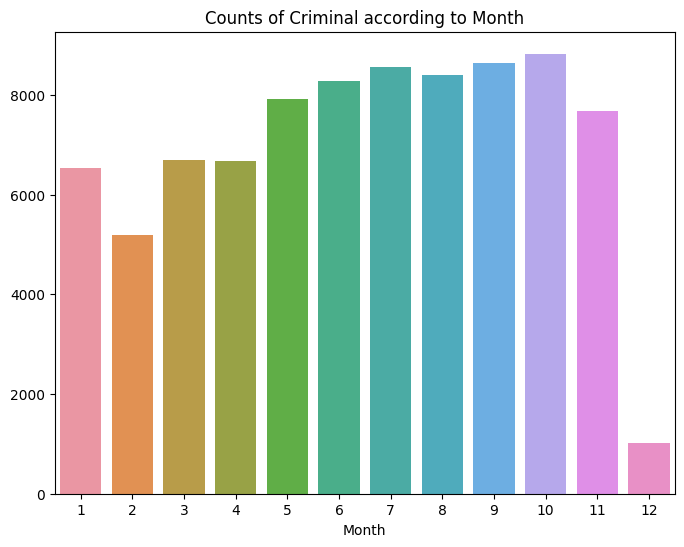

In [12]:
import seaborn as sns
plt.figure(figsize=(8,6))
import warnings
warnings.filterwarnings('ignore')

months = train_df['월'].value_counts()
sns.barplot(x=months.index, y=months.values)
plt.title('Counts of Criminal according to Month')
plt.xlabel('Month')

In [64]:
pt_1 = pd.pivot_table(data=train_df,
              index=['월', 'TARGET'],
               values='ID',
              aggfunc=['count'])
pt_1

count
             ID
월  TARGET      
1  0       2910
   1       1884
   2       1742
2  0       2297
   1       1480
   2       1415
3  0       2840
   1       1908
   2       1945
4  0       2811
   1       1955
   2       1906
5  0       3376
   1       2276
   2       2264
6  0       3640
   1       2377
   2       2254
7  0       3627
   1       2560
   2       2372
8  0       3612
   1       2610
   2       2179
9  0       3780
   1       2660
   2       2201
10 0       3848
   1       2859
   2       2120
11 0       3236
   1       2514
   2       1932
12 0        476
   1        314
   2        226

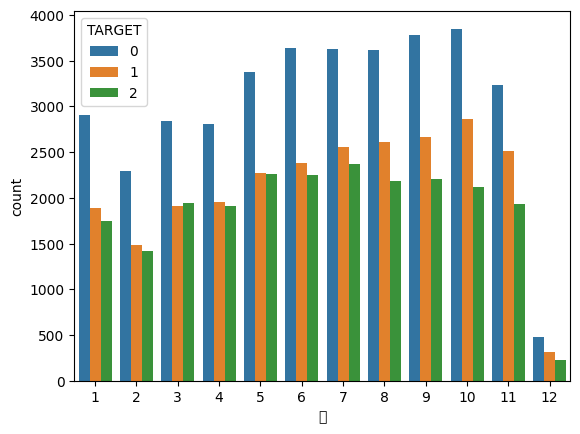

In [93]:
import seaborn as sns
sns.countplot(x = '월', hue = 'TARGET', data = train_df)
plt.show()

- 다른 월에 비해 12월의 범죄 발생 수가 현저히 낮음을 할 수 있다.

##### 요일

In [13]:
#요일 0,1,2..로 라벨인코딩 해주기
from sklearn.preprocessing import LabelEncoder

col = ['요일']

for i in col:
    encoder = LabelEncoder()
    encoder.fit(train_df[i])
    train_df[i] = encoder.transform(train_df[i])
    
for i in col:
    encoder = LabelEncoder()
    encoder.fit(test_df[i])
    test_df[i] = encoder.transform(test_df[i])

In [14]:
train_df.head(3)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,6,10,137,8.0,2.611124,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,6,6,438,13.0,3.209093,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,4,6,1729,47.0,1.619597,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1


In [15]:
test_df.head(3)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,TEST_00000,9,0,5,927,28.0,1.570654,19.625000,0.0,0.0,165.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,차도
1,TEST_00001,5,2,3,926,28.0,1.712457,21.444444,0.0,0.0,175.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,식당
2,TEST_00002,5,3,6,1437,33.0,0.447496,25.200000,0.0,0.0,290.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지


- 0: 월요일 ~ 6: 일요일

Text(0.5, 0, 'Day of the week')

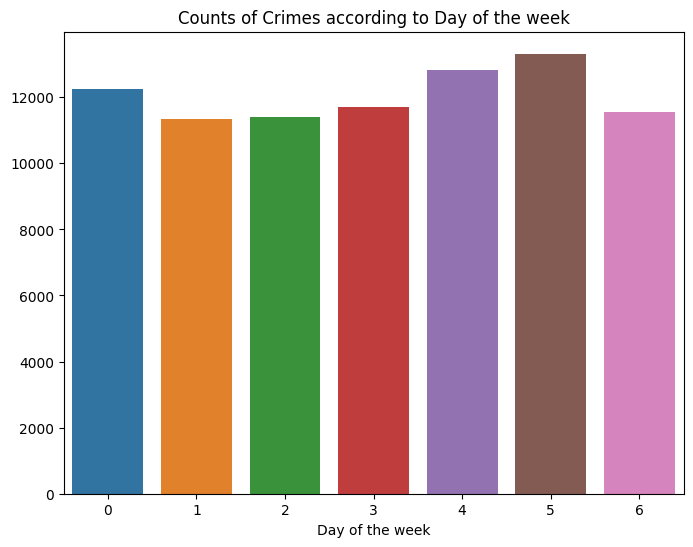

In [16]:
plt.figure(figsize=(8,6))
days = train_df['요일'].value_counts()
sns.barplot(x=days.index, y=days.values)
plt.title('Counts of Crimes according to Day of the week')
plt.xlabel('Day of the week')

- 요일에 따른 범죄 발생 수는 별로 차이가 없음

In [66]:
pt_2 = pd.pivot_table(data=train_df,
              index=['요일', 'TARGET'],
               values='ID',
              aggfunc=['count'])
pt_2

count
             ID
요일 TARGET      
0  0       5125
   1       3900
   2       3218
1  0       4747
   1       3700
   2       2884
2  0       4786
   1       3720
   2       2904
3  0       5090
   1       3471
   2       3141
4  0       6034
   1       3152
   2       3651
5  0       5871
   1       3753
   2       3693
6  0       4800
   1       3701
   2       3065

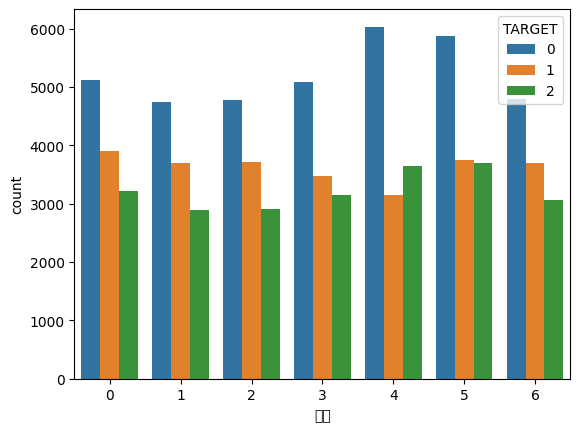

In [94]:
sns.countplot(x = '요일', hue = 'TARGET', data = train_df)
plt.show()

- 모든 요일에서 강도(0) 발생 수가 가장 많음

##### 시간

In [17]:
train_df['시간'].value_counts()

12    9440
10    7451
11    7423
9     7374
8     7130
1     7093
2     6800
3     6681
7     6452
4     6291
5     6152
6     6119
Name: 시간, dtype: int64

Text(0.5, 0, 'Time')

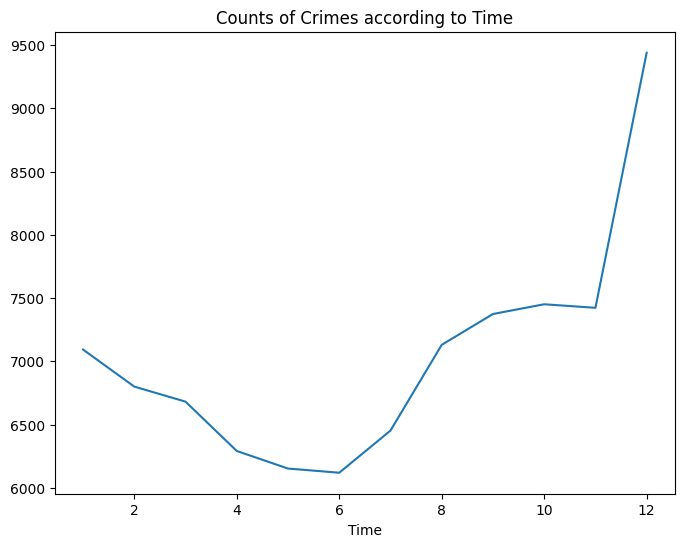

In [18]:
plt.figure(figsize=(8,6))
time = train_df['시간'].value_counts()
sns.lineplot(x=time.index, y=time.values)
plt.title('Counts of Crimes according to Time')
plt.xlabel('Time')

- 10~12시 밤 시간대에 사건 발생 수가 많다 

In [69]:
pt_3 = pd.pivot_table(data=train_df,
              index=['시간', 'TARGET'],
               values='ID',
              aggfunc=['count'])
pt_3

count
             ID
시간 TARGET      
1  0       3174
   1       2015
   2       1904
2  0       3059
   1       1985
   2       1756
3  0       2911
   1       2014
   2       1756
4  0       2786
   1       1926
   2       1579
5  0       2631
   1       1983
   2       1538
6  0       2575
   1       2026
   2       1518
7  0       2698
   1       2067
   2       1687
8  0       3062
   1       2162
   2       1906
9  0       3115
   1       2159
   2       2100
10 0       3204
   1       2107
   2       2140
11 0       3376
   1       1946
   2       2101
12 0       3862
   1       3007
   2       2571

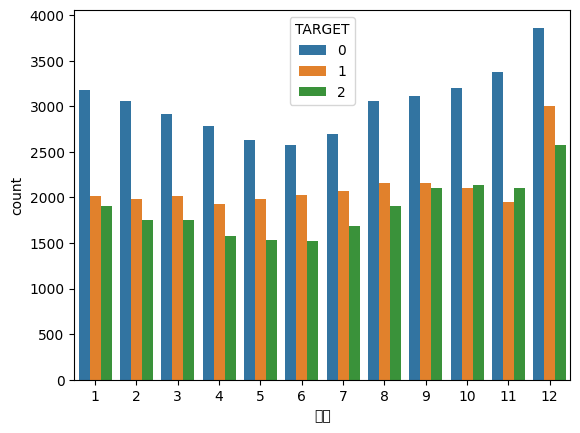

In [95]:
sns.countplot(x = '시간', hue = 'TARGET', data = train_df)
plt.show()

- 강도(0)은 모든 시간대에서 가장 많이 일어나는 범죄 유형임


- 절도, 상해는 12시에 가장 많이 일어남 >> 어두운 시각이라

#### 2) 지역, 거리 관련 칼럼 살펴보기(소관경찰서, 소관지역, 사건발생거리)

In [19]:
train_df.head()

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,6,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,6,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,4,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,3,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,4,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2


In [20]:
train_df['소관경찰서'].value_counts()

1749    911
539     852
426     663
546     658
338     641
       ... 
1527     83
1546     83
727      73
726      13
1529      1
Name: 소관경찰서, Length: 269, dtype: int64

Text(0.5, 0, 'Police Station')

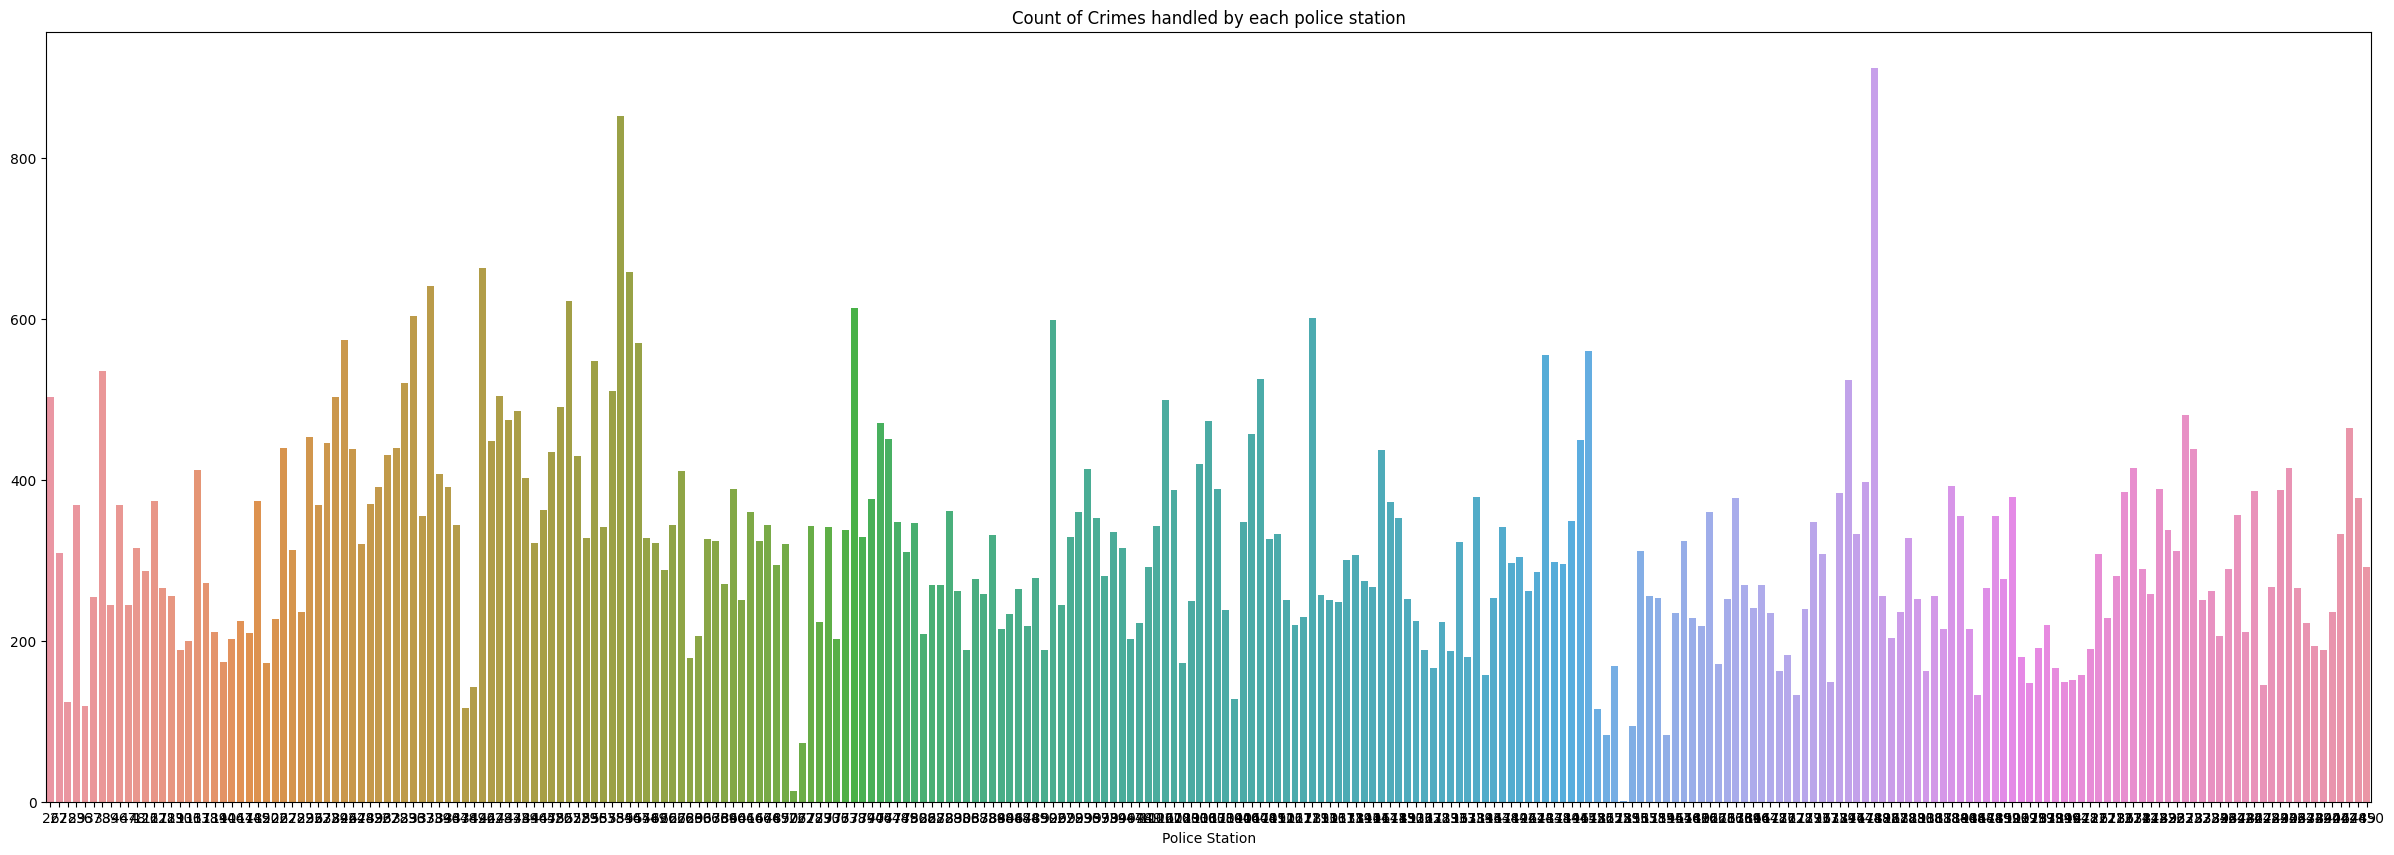

In [21]:
plt.figure(figsize=(30,10))
police = train_df['소관경찰서'].value_counts()
sns.barplot(x=police.index, y=police.values)
plt.title('Count of Crimes handled by each police station', fontsize='large')
plt.xlabel('Police Station')

- 1749, 539번 경찰서가 다른 경찰서에 비해 유난히 사건을 많이 담당함(800건이 넘음)

In [22]:
train_df['소관지역'].value_counts()

32.0    4033
31.0    3870
46.0    3553
10.0    3550
28.0    3207
12.0    3050
21.0    2978
24.0    2894
25.0    2748
13.0    2732
20.0    2644
11.0    2543
38.0    2521
41.0    2415
9.0     2362
7.0     2301
8.0     2243
33.0    2065
29.0    1699
53.0    1449
6.0     1428
5.0     1419
48.0    1318
30.0    1311
14.0    1299
19.0    1294
50.0    1175
16.0    1074
26.0    1067
15.0    1064
22.0    1061
44.0    1058
36.0    1055
52.0    1053
40.0    1005
35.0     985
18.0     979
54.0     975
39.0     971
34.0     951
47.0     907
51.0     883
49.0     864
37.0     837
43.0     790
27.0     608
23.0     607
17.0     599
42.0     587
45.0     325
Name: 소관지역, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, '5.0'),
  Text(1, 0, '6.0'),
  Text(2, 0, '7.0'),
  Text(3, 0, '8.0'),
  Text(4, 0, '9.0'),
  Text(5, 0, '10.0'),
  Text(6, 0, '11.0'),
  Text(7, 0, '12.0'),
  Text(8, 0, '13.0'),
  Text(9, 0, '14.0'),
  Text(10, 0, '15.0'),
  Text(11, 0, '16.0'),
  Text(12, 0, '17.0'),
  Text(13, 0, '18.0'),
  Text(14, 0, '19.0'),
  Text(15, 0, '20.0'),
  Text(16, 0, '21.0'),
  Text(17, 0, '22.0'),
  Text(18, 0, '23.0'),
  Text(19, 0, '24.0'),
  Text(20, 0, '25.0'),
  Text(21, 0, '26.0'),
  Text(22, 0, '27.0'),
  Text(23, 0, '28.0'),
  Text(24, 0, '29.0'),
  Text(25, 0, '30.0'),
  Text(26, 0, '31.0'),
  Text(27, 0, '32.0'),
  Text(28, 0, '33.0'),
  Text(29, 0, '34.0'),
  Text(30, 0, '35.0'),
  Text(31, 0, '36.0'),
  Text(32, 0, '37.0'),
  Text(33, 0, '38.0'),
  Text(

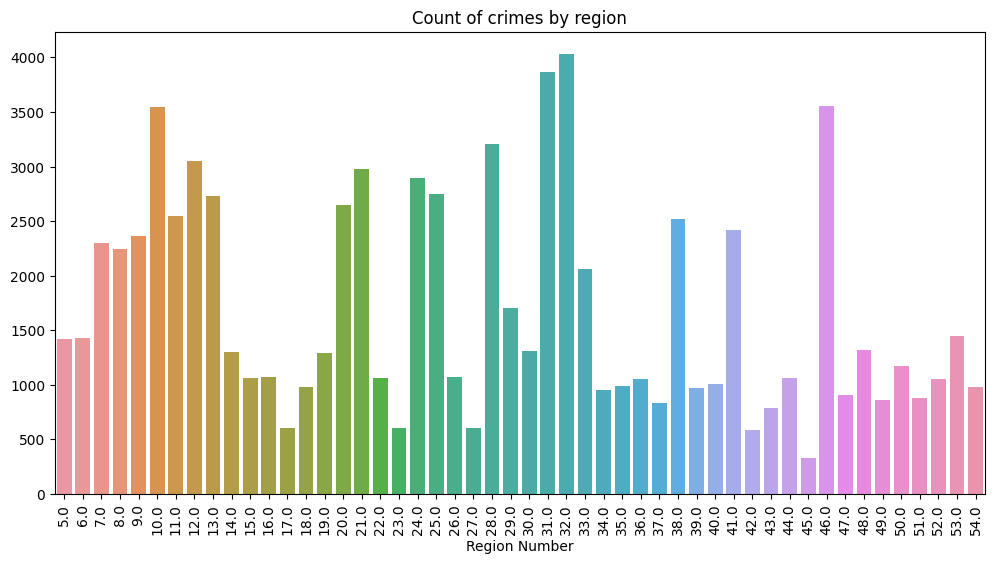

In [23]:
plt.figure(figsize=(12,6))
region = train_df['소관지역'].value_counts()
sns.barplot(x=region.index, y=region.values)
plt.title('Count of crimes by region')
plt.xlabel('Region Number')
plt.xticks(rotation=90)

- 10, 31, 32, 46번 구역이 유난히 범죄 발생 수가 많고 17, 23, 27, 42, 45번 구역이 유난히 적다.

In [24]:
train_df.groupby('TARGET')['사건발생거리'].mean()

TARGET
0    1.912099
1    1.901520
2    1.925227
Name: 사건발생거리, dtype: float64

- 강도, 절도, 상해 범죄 모두 사건 현장에서 경찰서까지의 거리가 평균 1.91정도임 >> 소수점 둘째자리까지만 나타내도 괜찮을 것 같음

In [25]:
train_df['사건발생거리'] = train_df['사건발생거리'].round(2)
test_df['사건발생거리'] = test_df['사건발생거리'].round(2)

##### 범죄 유형별로 보기

In [71]:
pt_4 = pd.pivot_table(data=train_df,
              index=['소관경찰서', 'TARGET'],
               values='ID',
              aggfunc=['count'])
pt_4

count
                ID
소관경찰서 TARGET      
26    0        121
      1        348
      2         34
27    0         81
      1        200
...            ...
2449  1         86
      2        113
2450  0        117
      1         93
      2         82

[805 rows x 1 columns]

In [62]:
pd.pivot_table(data=train_df,
              index=['사건발생거리', 'TARGET'],
               values='ID',
              aggfunc=['count'])

count
                 ID
사건발생거리 TARGET      
0.01   0          5
       1          2
       2         10
0.02   0         12
       1          4
...             ...
4.99   0          6
       1          2
       2          2
5.00   0          1
       2          1

[1496 rows x 1 columns]

In [77]:
pt_5 = pd.pivot_table(data=train_df,
              index=['소관지역', 'TARGET'],
               values='ID',
              aggfunc=['count'])
pt_5

count
               ID
소관지역 TARGET      
5.0  0        507
     1        669
     2        243
6.0  0        469
     1        755
...           ...
53.0 1        548
     2        293
54.0 0        364
     1        395
     2        216

[150 rows x 1 columns]

#### 3) 날씨 관련 칼럼 살펴보기 1(강수량, 강설량, 적설량)

In [129]:
train_df['강수량(mm)'].value_counts()

0.0      40394
1.0       6034
5.0       1889
2.0       1717
4.0       1694
         ...  
100.0      175
44.0       170
108.0      156
186.0      141
187.0      125
Name: 강수량(mm), Length: 80, dtype: int64

In [26]:
train_df.groupby('TARGET')['강수량(mm)'].mean()

TARGET
0    24.873819
1    24.723934
2    24.050773
Name: 강수량(mm), dtype: float64

- 비가 안오는 날이 가장 많음 >> 84406개의 데이터 중 50000개가 넘는 데이터가 비가 안오거나, 1~5mm임

- 세 가지 범죄 유형이 각각 일어날 때, 평균 강수량은 약 24mm였음

- 강수량의 단위는 mm인데 소수점 6번째까지 나타낼 필요는 없음(0.1mm나 0.2mm나 차이가 없기 때문)

In [27]:
train_df['강수량(mm)'] = train_df['강수량(mm)'].round(0)
test_df['강수량(mm)'] = test_df['강수량(mm)'].round(0)

In [28]:
train_df.head(3)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,6,10,137,8.0,2.61,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,6,6,438,13.0,3.21,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,4,6,1729,47.0,1.62,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1


In [29]:
test_df.head(3)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,TEST_00000,9,0,5,927,28.0,1.57,20.0,0.0,0.0,165.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,차도
1,TEST_00001,5,2,3,926,28.0,1.71,21.0,0.0,0.0,175.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,식당
2,TEST_00002,5,3,6,1437,33.0,0.45,25.0,0.0,0.0,290.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지


- 강설량, 적설량도 동일하게 해주기

In [30]:
train_df['강설량(mm)'].value_counts()

0.000000      77758
8.250000        478
15.800000       242
1.250000        238
11.400000       231
18.750000       225
1.500000        223
16.285714       217
35.000000       216
6.600000        212
8.600000        207
5.750000        203
12.833333       200
3.600000        196
4.285714        196
12.000000       191
7.666667        190
45.500000       190
72.500000       188
6.571429        186
2.571429        180
25.500000       179
62.250000       175
10.200000       172
34.000000       170
17.800000       170
40.750000       170
26.800000       167
8.285714        165
19.800000       163
1.857143        158
103.000000      156
188.000000      141
66.750000       128
295.000000      125
Name: 강설량(mm), dtype: int64

In [31]:
train_df.groupby('TARGET')['강설량(mm)'].mean()

TARGET
0    2.632060
1    1.965751
2    2.081356
Name: 강설량(mm), dtype: float64

- 눈이 안오는 날이 가장 많음

- 0: 강도 범죄 발생 시 평균 강설량은 약 2.63mm

- 1: 절도 범죄 발생 시 평균 강설량은 약 1.96mm

- 2: 상해 범죄 발생 시 평균 강설량은 약 2.08mm

- 전체 데이터 중 77000개가 넘는 데이터가 눈이 안오는 날임 >> 나중에 드랍

In [35]:
train_df['적설량(cm)'].value_counts()

0.000000      72318
10.000000      1063
8.333333        657
4.333333        437
309.400000      390
50.666667       389
263.600000      343
272.600000      337
39.666667       311
147.750000      255
29.333333       243
22.666667       242
14.333333       238
81.500000       236
18.666667       231
44.000000       227
67.333333       225
177.800000      221
358.600000      221
107.200000      217
48.333333       216
42.000000       216
253.600000      213
19.000000       212
10.750000       207
29.666667       206
156.600000      204
336.400000      204
510.600000      203
465.200000      199
434.600000      196
416.000000      191
123.600000      190
365.200000      188
21.000000       180
136.000000      179
279.200000      179
305.400000      175
350.800000      175
37.666667       173
340.800000      170
144.000000      170
30.750000       170
296.800000      167
531.800000      167
307.600000      158
89.250000       156
577.200000      147
288.600000      141
361.400000      128


In [36]:
train_df.groupby('TARGET')['적설량(cm)'].mean()

TARGET
0    24.220774
1    22.371577
2    23.345640
Name: 적설량(cm), dtype: float64

- 전체 데이터 중 눈이 안쌓인 날이 72000개가 넘음 >> 나중에 드랍

#### 4) 날씨 관련 칼럼 2(풍향, 안개, 짙은 안개, 번개, 진눈깨비, 서리, 연기/연무, 눈날림)

In [80]:
train_df['풍향'].mean()

186.9261071487809

In [41]:
train_df.groupby('TARGET')['풍향'].mean()

TARGET
0    187.421886
1    187.011458
2    186.028773
Name: 풍향, dtype: float64

In [42]:
train_df.groupby(by='안개')['TARGET'].count()

안개
0.0    51874
1.0    32532
Name: TARGET, dtype: int64

In [79]:
pt_6 = pd.pivot_table(data=train_df,
              index=['안개', 'TARGET'],
               values='ID',
              aggfunc=['count'])
pt_6

count
               ID
안개  TARGET       
0.0 0       22301
    1       15622
    2       13951
1.0 0       14152
    1        9775
    2        8605

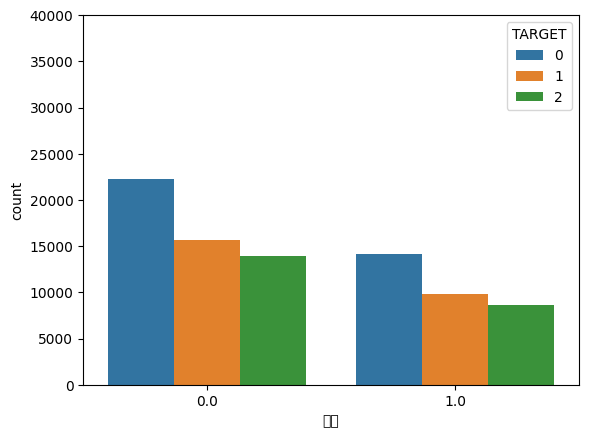

In [120]:
sns.countplot(x = '안개', hue = 'TARGET', data = train_df)
plt.ylim(0, 40000)
plt.show()

- 강도보다 상대적으로 발생 수가 적은 절도, 상해 범죄는 안개가 있는 날보다 없는 날 더 많이 일어난다.

In [43]:
print(train_df.groupby(by='짙은안개')['TARGET'].count())
print(train_df.groupby(by='번개')['TARGET'].count())
print(train_df.groupby(by='진눈깨비')['TARGET'].count())
print(train_df.groupby(by='서리')['TARGET'].count())
print(train_df.groupby(by='연기/연무')['TARGET'].count())
print(train_df.groupby(by='눈날림')['TARGET'].count())

짙은안개
0.0    82900
1.0     1506
Name: TARGET, dtype: int64
번개
0.0    72248
1.0    12158
Name: TARGET, dtype: int64
진눈깨비
0.0    82690
1.0     1716
Name: TARGET, dtype: int64
서리
0.0    83540
1.0      866
Name: TARGET, dtype: int64
연기/연무
0.0    66617
1.0    17789
Name: TARGET, dtype: int64
눈날림
0.0    83653
1.0      753
Name: TARGET, dtype: int64


- 짙은안개(가시거리가 200m 미만인 경우), 번개, 진눈깨비, 서리, 연기/연무, 눈날림은 없을 때가 훨씬 더 많음

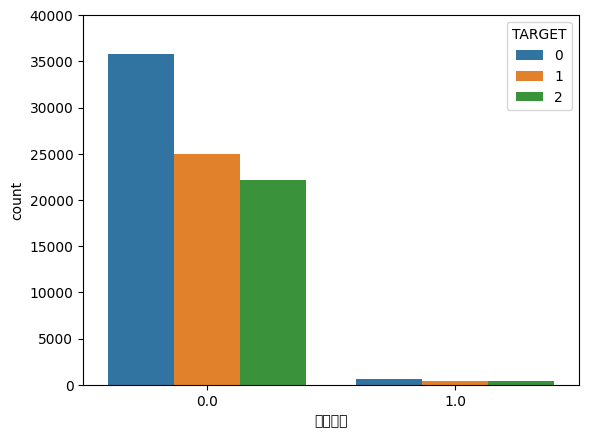

In [119]:
sns.countplot(x = '짙은안개', hue = 'TARGET', data = train_df)
plt.ylim(0, 40000)
plt.show()

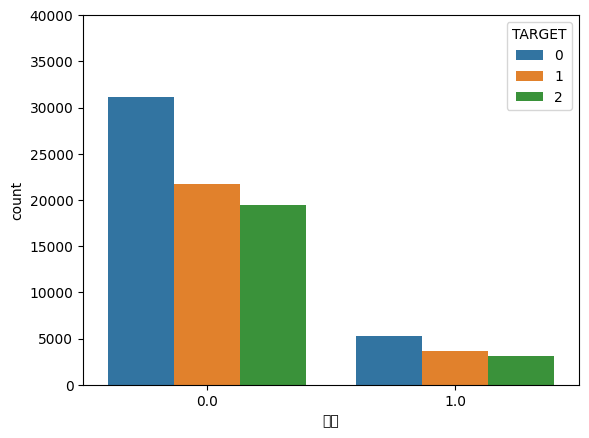

In [118]:
sns.countplot(x = '번개', hue = 'TARGET', data = train_df)
plt.ylim(0, 40000)
plt.show()

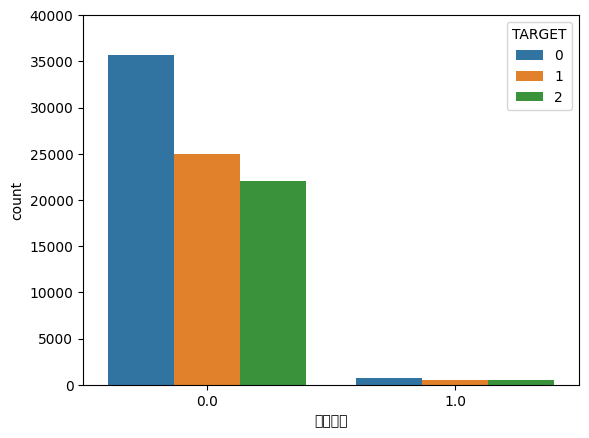

In [117]:
sns.countplot(x = '진눈깨비', hue = 'TARGET', data = train_df)
plt.ylim(0, 40000)
plt.show()

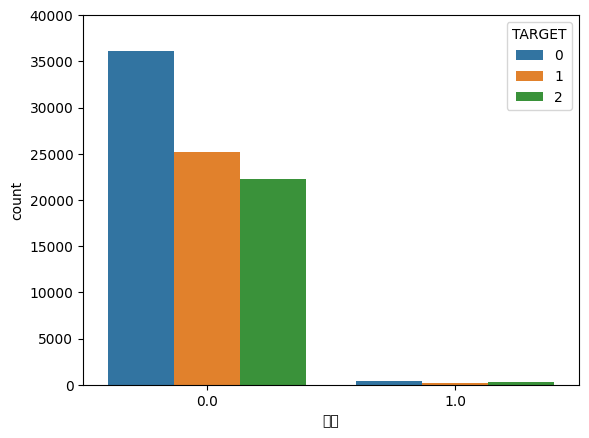

In [116]:
sns.countplot(x = '서리', hue = 'TARGET', data = train_df)
plt.ylim(0, 40000)
plt.show()

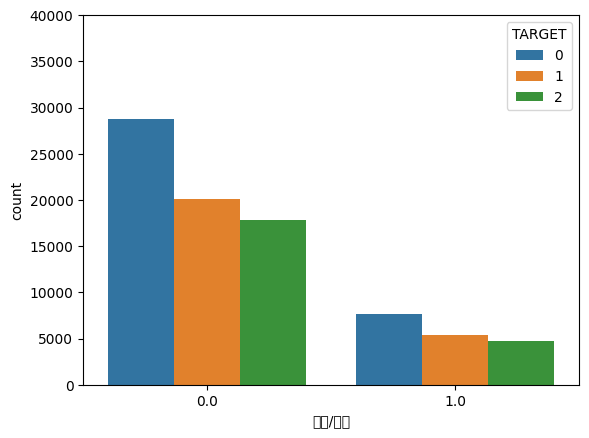

In [115]:
sns.countplot(x = '연기/연무', hue = 'TARGET', data = train_df)
plt.ylim(0, 40000)
plt.show()

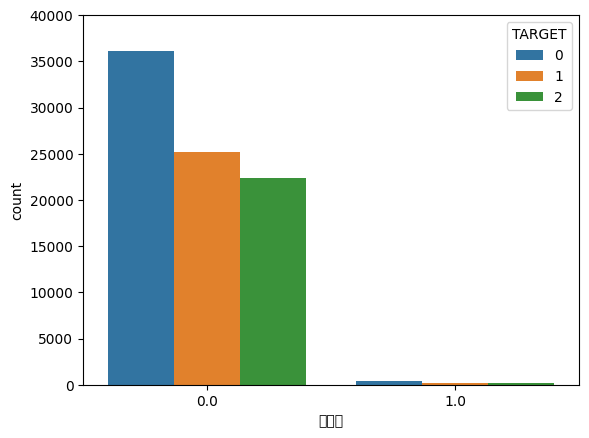

In [114]:
sns.countplot(x = '눈날림', hue = 'TARGET', data = train_df)
plt.ylim(0, 40000)
plt.show()

- 나머지 날씨 칼럼들도 동일, 날씨에 영향을 받아서 0인날 범죄가 발생한다기보단 특정 날씨 유형이 나타나지 않는 날이 더 많아서 그런 것 같음

- 그래프 y축을 모두 통일시켜서 살펴본 결과, 그나마 다른 날씨 유형보다 '안개' 유무에 따른 범죄 발생 수가 덜 차이난다

#### 5) 범죄발생지 칼럼 살펴보기

In [44]:
train_df['범죄발생지'].value_counts()

주거지      36077
차도       25879
인도        6437
편의점       4835
주차장       3262
식당        1806
백화점       1493
주유소       1324
공원         736
학교         728
약국         653
호텔/모텔      591
병원         453
은행         132
Name: 범죄발생지, dtype: int64

- 장소에 따른 전체적인 범죄 발생 수는 주거지, 차도에서 가장 높고 병원과 은행에서 가장 낮다

In [45]:
pd.pivot_table(data=train_df,
              index=["범죄발생지", 'TARGET'],
               values='ID',
              aggfunc=['count'])

count
                 ID
범죄발생지 TARGET       
공원    0         296
      1         307
      2         133
백화점   0         172
      1        1291
      2          30
병원    0         281
      1         128
      2          44
식당    0         887
      1         615
      2         304
약국    0          96
      1         541
      2          16
은행    0          61
      1          29
      2          42
인도    0        4537
      1         865
      2        1035
주거지   0       19566
      1        8349
      2        8162
주유소   0         606
      1         371
      2         347
주차장   0         842
      1        1403
      2        1017
차도    0        7135
      1        7907
      2       10837
편의점   0        1189
      1        3259
      2         387
학교    0         463
      1         137
      2         128
호텔/모텔 0         322
      1         195
      2          74

- 강도(0)가 많이 일어나는 장소: 병원, 식당, 은행, 인도, 주거지, 주유소, 학교, 호텔/모텔


- 절도(1)가 많이 일어나는 장소: 공원, 백화점, 약국, 주차장 >> 대부분 무언가 판매하는 곳이거나 불특정 다수가 모이는 곳


- 상해(2)가 많이 일어나는 장소: 차도


- 장소마다 상대적으로 특정 유형의 범죄가 많이 발생한다는 것이지 비교 대상이 적절하진 않음

ex) 1. 공원은 발생 수로만 따졌을 때, 절도가 많이 일어나지만 다른 장소들의 비해 3가지 유형의 범죄 발생 수가 비교적 비슷하다.
   2. 백화점, 약국, 편의점같은 경우 다른 범죄에 비해 2,3배 차이 날 정도로 절도(1)가 월등히 많이 일어난다.
   3. 주거지의 경우, 모든 범죄의 발생 수가 다른 장소에 비해 월등히 많이 일어나고, 은행의 경우 월등히 적게 일어난다.

- 범죄발생지가 한글로 표기되어 있고, 유일값이 14개뿐이므로 0,1,2.. 로 인코딩 해주는게 나을 것 같음

In [46]:
from sklearn.preprocessing import LabelEncoder

col = ['범죄발생지']

for i in col:
    encoder = LabelEncoder()
    encoder.fit(train_df[i])
    train_df[i] = encoder.transform(train_df[i])
    
for i in col:
    encoder = LabelEncoder()
    encoder.fit(test_df[i])
    test_df[i] = encoder.transform(test_df[i])

In [47]:
train_df.head(3)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,6,10,137,8.0,2.61,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,2
1,TRAIN_00001,11,6,6,438,13.0,3.21,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0
2,TRAIN_00002,8,4,6,1729,47.0,1.62,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6,1


In [48]:
test_df.head(3)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,TEST_00000,9,0,5,927,28.0,1.57,20.0,0.0,0.0,165.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10
1,TEST_00001,5,2,3,926,28.0,1.71,21.0,0.0,0.0,175.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3
2,TEST_00002,5,3,6,1437,33.0,0.45,25.0,0.0,0.0,290.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7


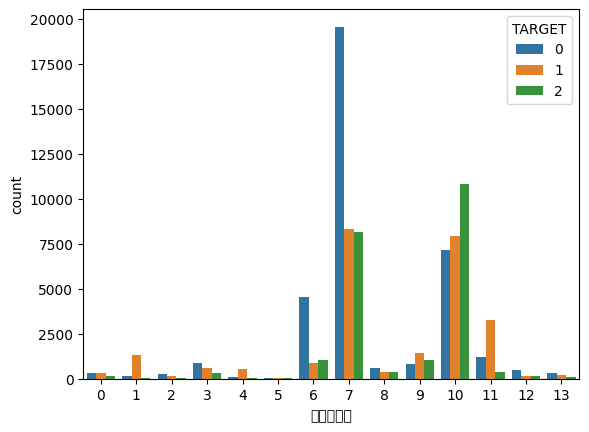

<Figure size 800x600 with 0 Axes>

In [124]:
sns.countplot(x = '범죄발생지', hue = 'TARGET', data = train_df)
plt.figure(figsize=(8,6))
plt.show()

#### 6) 이상치 확인, 전처리

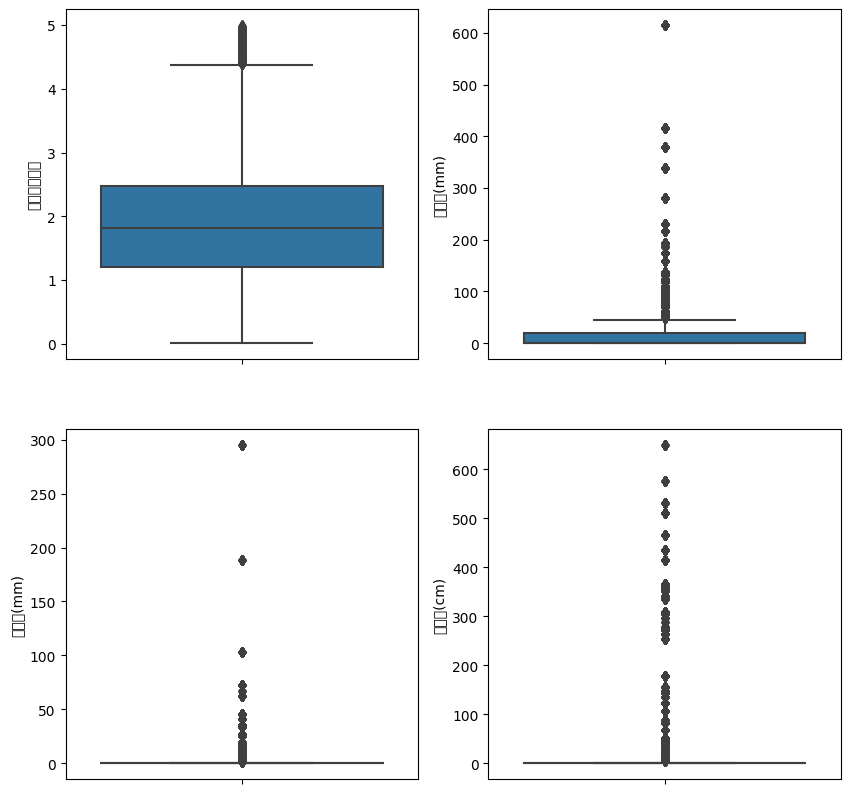

In [128]:
fig, axes = plt.subplots(2,2, figsize = (10,10))

sns.boxplot(y = train_df['사건발생거리'], ax = axes[0][0])
sns.boxplot(y = train_df['강수량(mm)'], ax = axes[0][1])

sns.boxplot(y = train_df['강설량(mm)'], ax = axes[1][0])
sns.boxplot(y = train_df['적설량(cm)'], ax = axes[1][1])

plt.show()

- train 데이터와 test 데이터 나눠주기

In [133]:
X_train = train_df.drop(['ID', "TARGET", '강설량(mm)', '적설량(cm)', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림'], axis=1)
y_train = train_df['TARGET']

X_test = test_df.drop(['ID', '강설량(mm)', '적설량(cm)', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림'], axis=1)

#### 7) 모델 정의, 학습, 예측 결과 내기

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
pred

array([2, 0, 0, ..., 0, 0, 1])

In [136]:
submit = pd.read_csv('sample_submission.csv')

In [137]:
submit['TARGET'] = pred
submit.head()

,ID,TARGET
0,TEST_00000,2
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [138]:
submit.to_csv('submit.csv', index = False)

#### 8) 드랍시켰던 칼럼들 다시 포함시키고 한번 더 예측해보기

In [142]:
X_train_1 = train_df.drop(['ID', "TARGET"], axis=1)
y_train_1 = train_df['TARGET']

X_test_1 = test_df.drop(['ID'], axis=1)

In [144]:
rf_clf_1 = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf_1.fit(X_train_1, y_train_1)
pred1 = rf_clf_1.predict(X_test_1)
pred1

array([2, 0, 0, ..., 0, 0, 1])

In [146]:
submit1 = pd.read_csv('sample_submission.csv')

In [147]:
submit1['TARGET'] = pred1
submit1.head()

,ID,TARGET
0,TEST_00000,2
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [148]:
submit1.to_csv('submit1.csv', index = False)